In [101]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")

In [102]:
#importing the dataset
bike_data= pd.read_csv("day.csv")

In [103]:
bike_data.shape

(730, 16)

(730, 16)

In [104]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Exploring the data 

In [105]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [106]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 1

In [107]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [108]:
bike_data.drop("instant",axis= 1, inplace= True)

In [109]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [110]:
bike_data["age"]=(pd.to_datetime(bike_data["dteday"],format= "%d-%m-%Y") - pd.to_datetime("01-01-2018",format="%d-%m-%Y")).dt.days

In [111]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,age
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,age
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [112]:
#registered and casual are redundant variables which should be removed
bike_data.drop(["casual", "registered"], axis=1, inplace = True)

In [113]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [114]:
bike_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


<AxesSubplot:>

<AxesSubplot:>

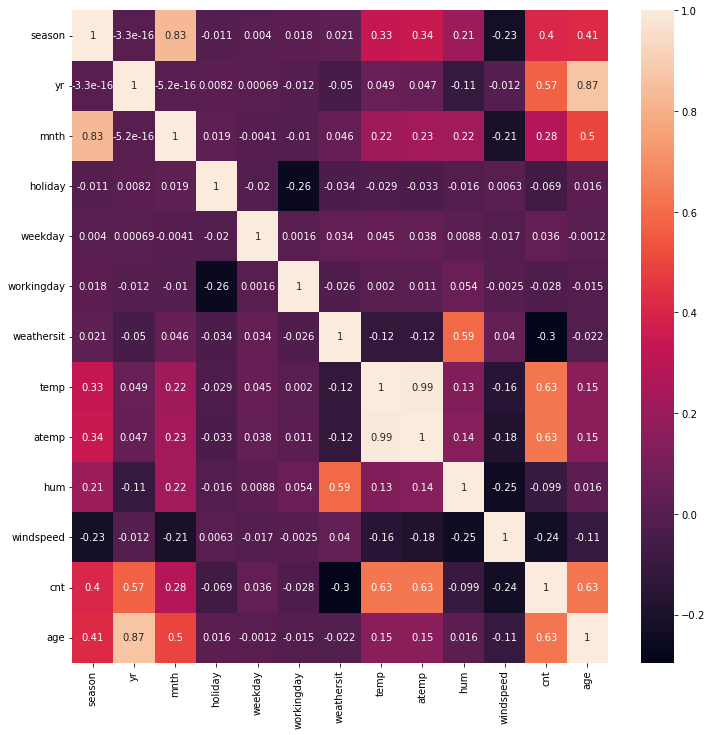

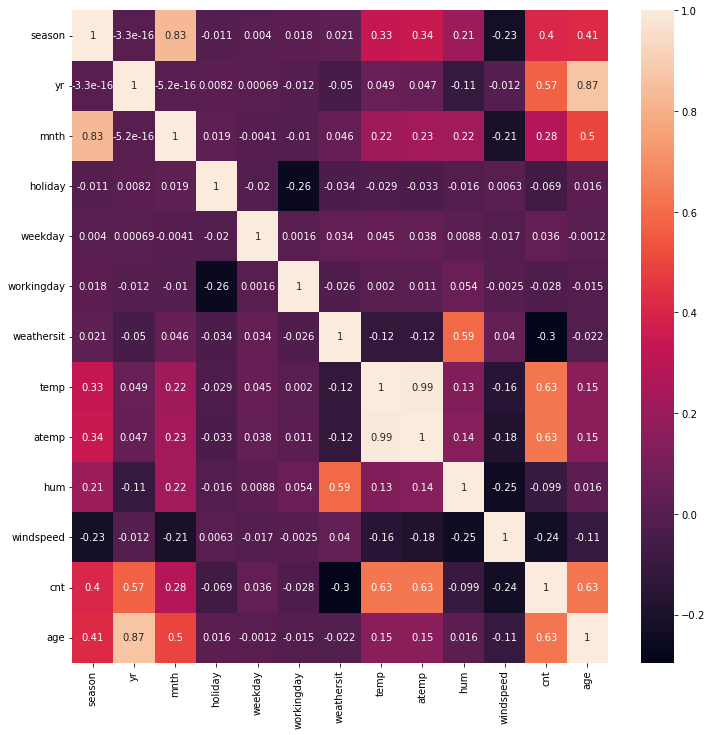

In [115]:
plt.rcParams["figure.figsize"]= (12,12)
sns.heatmap(bike_data.corr(), annot= True)

In [116]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [117]:
bike_data.nunique()

dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
age           730
dtype: int64

dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
age           730
dtype: int64

<AxesSubplot:>

<AxesSubplot:>

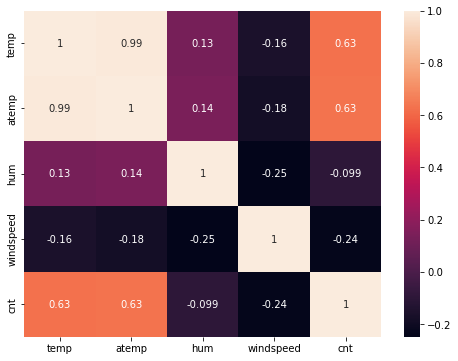

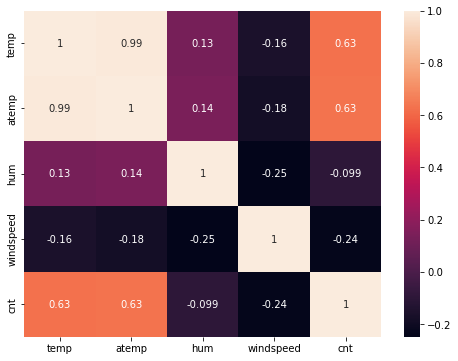

In [118]:
#correlation between the continuous variables
plt.rcParams["figure.figsize"]= (8,6)
sns.heatmap(bike_data[["temp", "atemp", "hum", "windspeed", "cnt"]].corr(), annot= True)

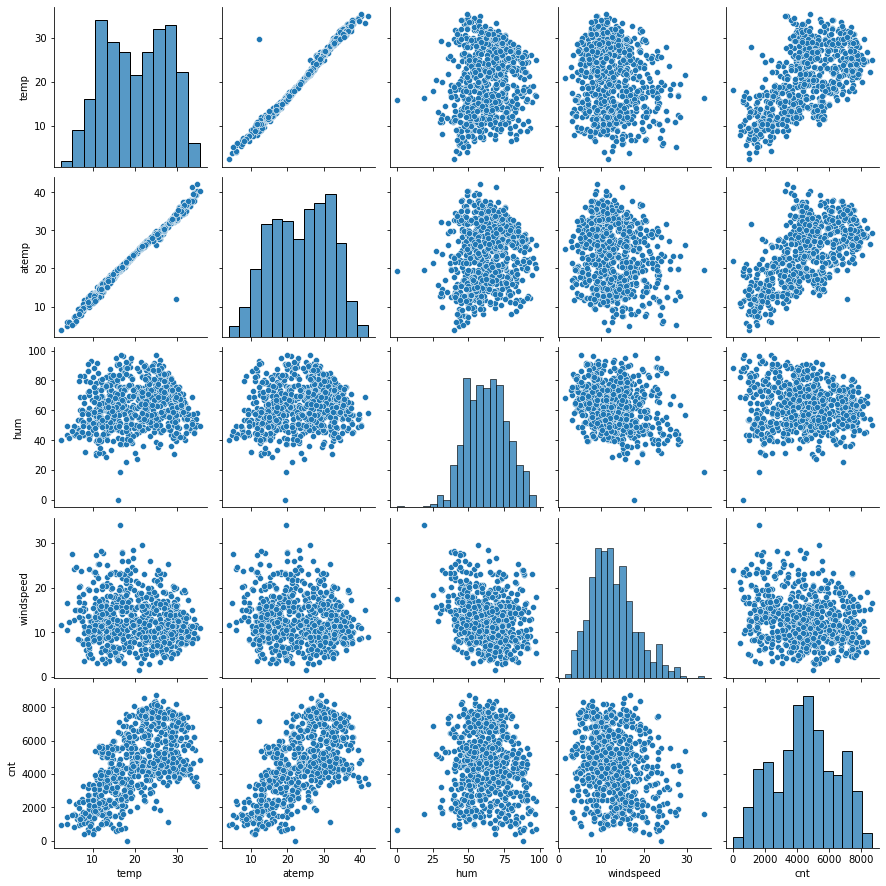

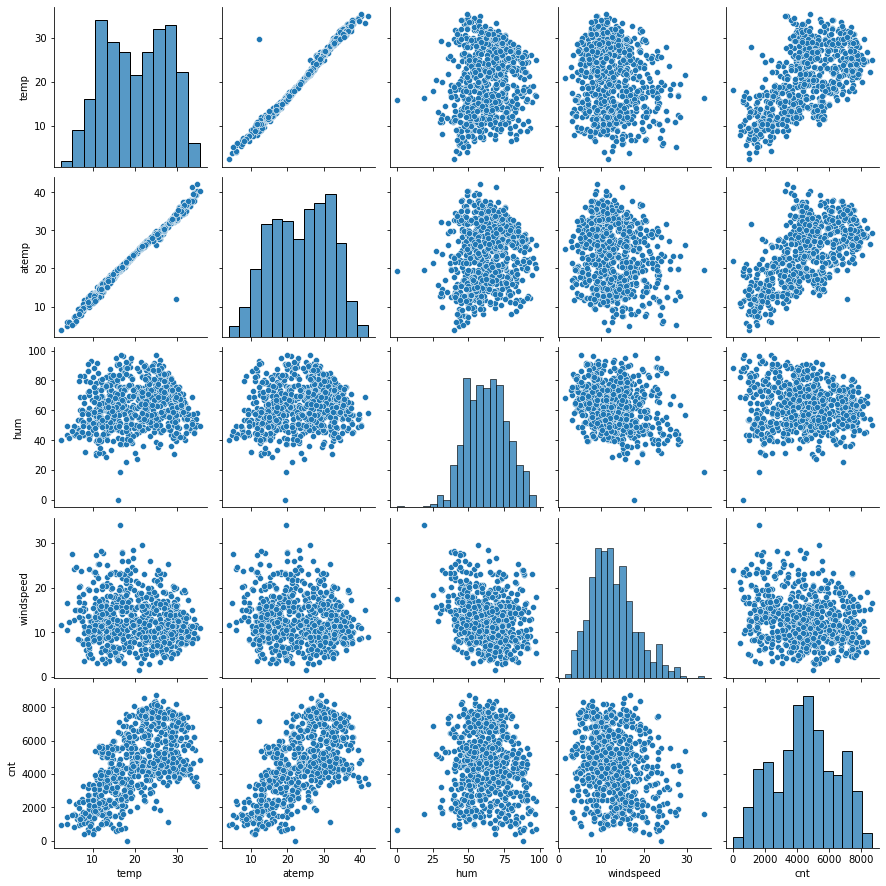

In [119]:
sns.pairplot(bike_data[["temp", "atemp", "hum", "windspeed", "cnt"]])

In [120]:
#first we need to convert numeric categorical variables to normal categorical variables
bike_data["season"].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace= True)

In [121]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
0,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
0,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [122]:
bike_data["mnth"].replace({1:"January", 2:"Febuary", 3:"March", 4:"April", 5:"May", 6: "June", 7:"July", 8:"August",9:"September", 10:"October", 11:"November", 12:"December"}, inplace= True)

In [123]:
bike_data.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
0,01-01-2018,spring,0,January,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,02-01-2018,spring,0,January,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,03-01-2018,spring,0,January,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,04-01-2018,spring,0,January,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,05-01-2018,spring,0,January,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4
5,06-01-2018,spring,0,January,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606,5
6,07-01-2018,spring,0,January,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510,6
7,08-01-2018,spring,0,January,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959,7
8,09-01-2018,spring,0,January,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822,8
9,10-01-2018,spring,0,January,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321,9


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
0,01-01-2018,spring,0,January,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,02-01-2018,spring,0,January,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,03-01-2018,spring,0,January,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,04-01-2018,spring,0,January,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,05-01-2018,spring,0,January,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4
5,06-01-2018,spring,0,January,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606,5
6,07-01-2018,spring,0,January,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510,6
7,08-01-2018,spring,0,January,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959,7
8,09-01-2018,spring,0,January,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822,8
9,10-01-2018,spring,0,January,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321,9


In [124]:
bike_data["weekday"].replace({1:"Monday", 2: "Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday", 0:"Sunday"}, inplace= True)

In [125]:
bike_data.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
0,01-01-2018,spring,0,January,0,Monday,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,02-01-2018,spring,0,January,0,Tuesday,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,03-01-2018,spring,0,January,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,04-01-2018,spring,0,January,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,05-01-2018,spring,0,January,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,1600,4
5,06-01-2018,spring,0,January,0,Saturday,0,1,8.378268,11.66045,51.8261,6.000868,1606,5
6,07-01-2018,spring,0,January,0,Sunday,0,2,8.057402,10.44195,49.8696,11.304642,1510,6
7,08-01-2018,spring,0,January,0,Monday,1,2,6.765000,8.11270,53.5833,17.875868,959,7
8,09-01-2018,spring,0,January,0,Tuesday,1,1,5.671653,5.80875,43.4167,24.250650,822,8
9,10-01-2018,spring,0,January,0,Wednesday,1,1,6.184153,7.54440,48.2917,14.958889,1321,9


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
0,01-01-2018,spring,0,January,0,Monday,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,02-01-2018,spring,0,January,0,Tuesday,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,03-01-2018,spring,0,January,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,04-01-2018,spring,0,January,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,05-01-2018,spring,0,January,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,1600,4
5,06-01-2018,spring,0,January,0,Saturday,0,1,8.378268,11.66045,51.8261,6.000868,1606,5
6,07-01-2018,spring,0,January,0,Sunday,0,2,8.057402,10.44195,49.8696,11.304642,1510,6
7,08-01-2018,spring,0,January,0,Monday,1,2,6.765000,8.11270,53.5833,17.875868,959,7
8,09-01-2018,spring,0,January,0,Tuesday,1,1,5.671653,5.80875,43.4167,24.250650,822,8
9,10-01-2018,spring,0,January,0,Wednesday,1,1,6.184153,7.54440,48.2917,14.958889,1321,9


In [126]:
bike_data["weathersit"].replace({1:"Clear", 2:"Overcast", 3:"Light Showers", 4:"Heavy Rains"}, inplace= True)

In [127]:
bike_data.head(10)


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
0,01-01-2018,spring,0,January,0,Monday,1,Overcast,14.110847,18.18125,80.5833,10.749882,985,0
1,02-01-2018,spring,0,January,0,Tuesday,1,Overcast,14.902598,17.68695,69.6087,16.652113,801,1
2,03-01-2018,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2
3,04-01-2018,spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,3
4,05-01-2018,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,4
5,06-01-2018,spring,0,January,0,Saturday,0,Clear,8.378268,11.66045,51.8261,6.000868,1606,5
6,07-01-2018,spring,0,January,0,Sunday,0,Overcast,8.057402,10.44195,49.8696,11.304642,1510,6
7,08-01-2018,spring,0,January,0,Monday,1,Overcast,6.765000,8.11270,53.5833,17.875868,959,7
8,09-01-2018,spring,0,January,0,Tuesday,1,Clear,5.671653,5.80875,43.4167,24.250650,822,8
9,10-01-2018,spring,0,January,0,Wednesday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321,9


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
0,01-01-2018,spring,0,January,0,Monday,1,Overcast,14.110847,18.18125,80.5833,10.749882,985,0
1,02-01-2018,spring,0,January,0,Tuesday,1,Overcast,14.902598,17.68695,69.6087,16.652113,801,1
2,03-01-2018,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2
3,04-01-2018,spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,3
4,05-01-2018,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,4
5,06-01-2018,spring,0,January,0,Saturday,0,Clear,8.378268,11.66045,51.8261,6.000868,1606,5
6,07-01-2018,spring,0,January,0,Sunday,0,Overcast,8.057402,10.44195,49.8696,11.304642,1510,6
7,08-01-2018,spring,0,January,0,Monday,1,Overcast,6.765000,8.11270,53.5833,17.875868,959,7
8,09-01-2018,spring,0,January,0,Tuesday,1,Clear,5.671653,5.80875,43.4167,24.250650,822,8
9,10-01-2018,spring,0,January,0,Wednesday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321,9


<AxesSubplot:xlabel='mnth', ylabel='cnt'>

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

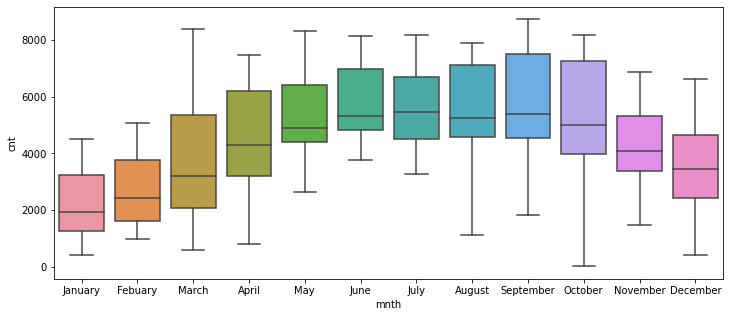

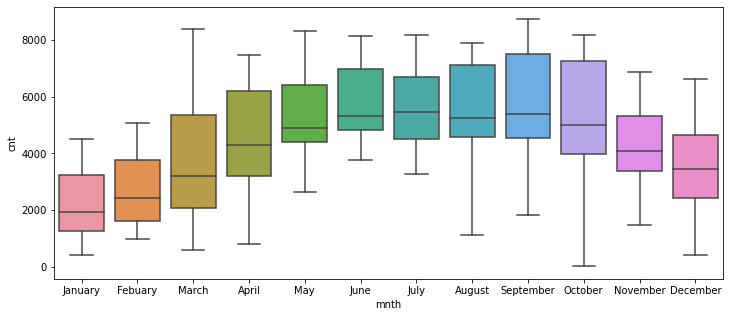

In [128]:
plt.rcParams["figure.figsize"]= (12,5)
sns.boxplot(x="mnth", y= "cnt", data= bike_data)

<AxesSubplot:xlabel='season', ylabel='cnt'>

<AxesSubplot:xlabel='season', ylabel='cnt'>

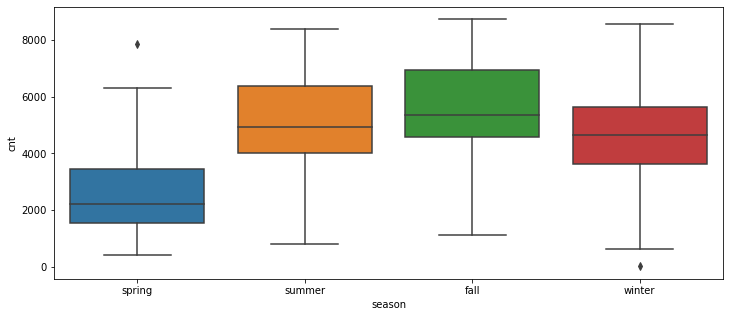

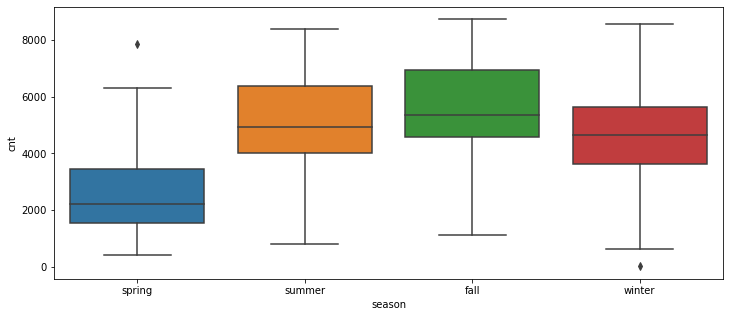

In [129]:
sns.boxplot(x="season", y= "cnt", data= bike_data)

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

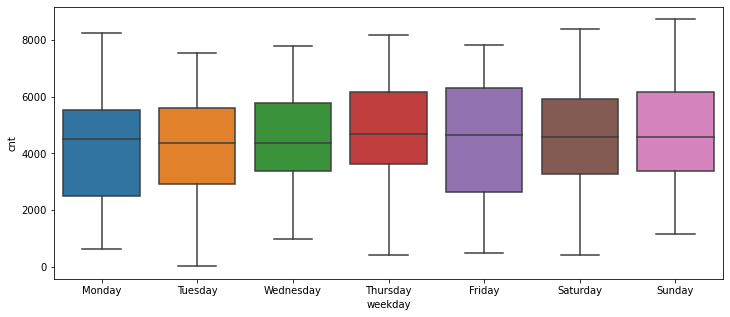

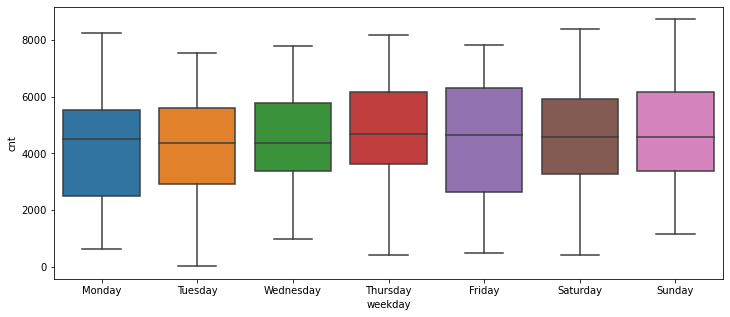

In [130]:
sns.boxplot(x="weekday", y= "cnt", data= bike_data)

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

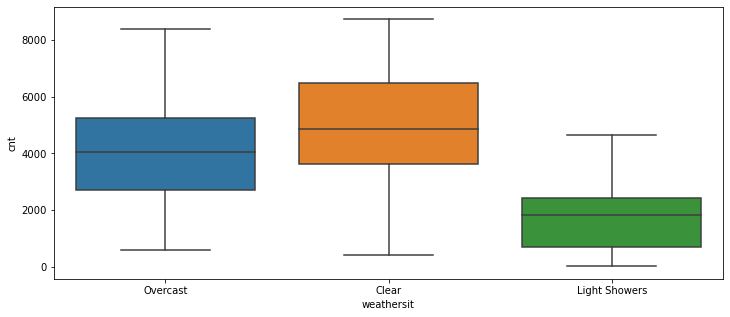

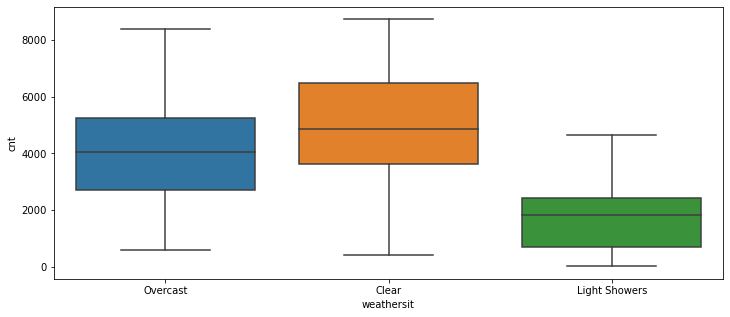

In [131]:
sns.boxplot(x="weathersit", y= "cnt", data= bike_data)

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

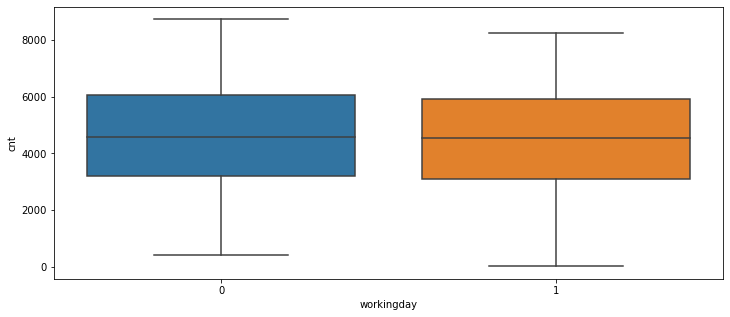

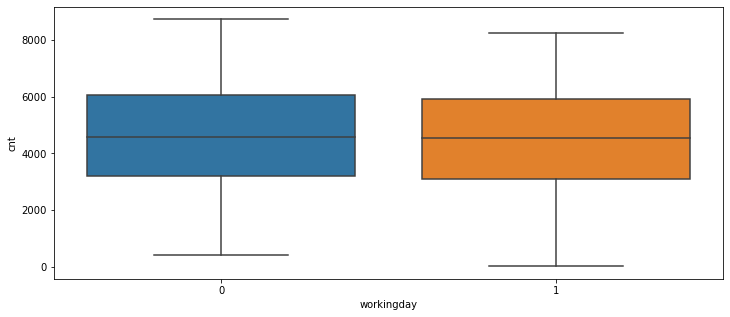

In [132]:
sns.boxplot(x="workingday", y= "cnt", data= bike_data)

<AxesSubplot:xlabel='yr', ylabel='cnt'>

<AxesSubplot:xlabel='yr', ylabel='cnt'>

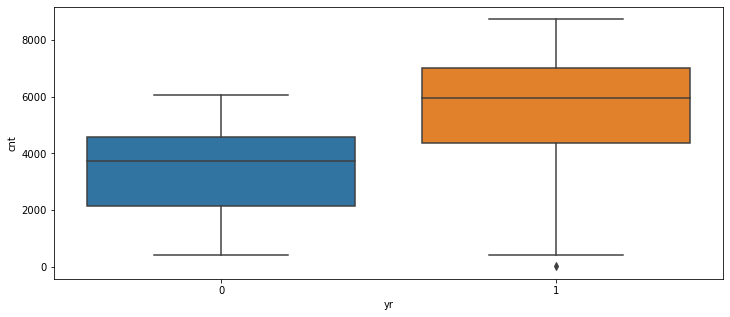

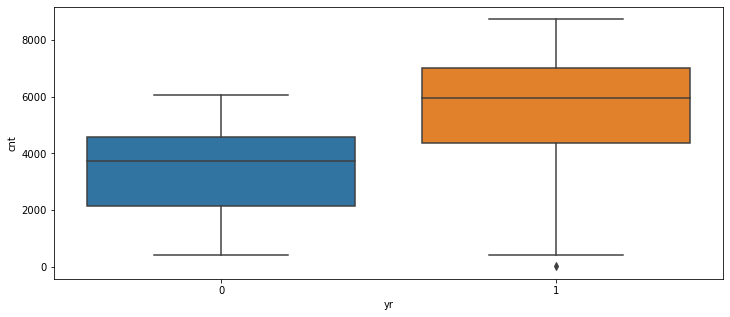

In [133]:
sns.boxplot(x="yr", y= "cnt", data= bike_data)

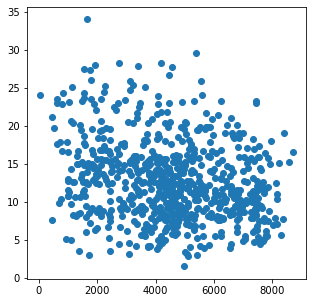

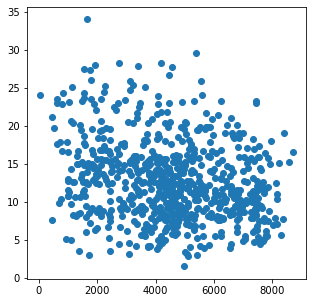

In [134]:
plt.rcParams["figure.figsize"]= (5,5)
plt.scatter(x=bike_data["cnt"], y=bike_data["windspeed"])

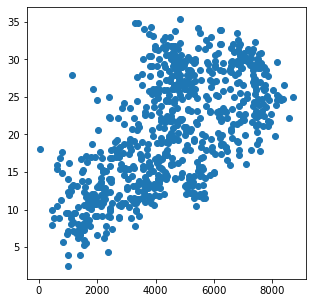

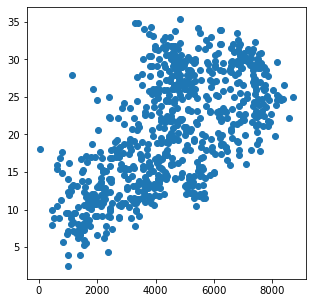

In [135]:
plt.scatter(x=bike_data["cnt"], y=bike_data["temp"])

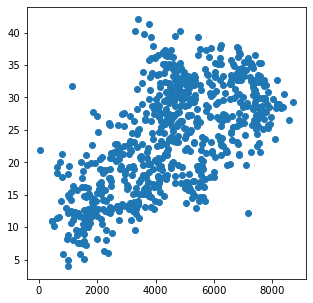

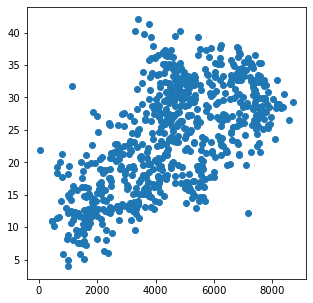

In [136]:
plt.scatter(x=bike_data["cnt"], y=bike_data["atemp"])

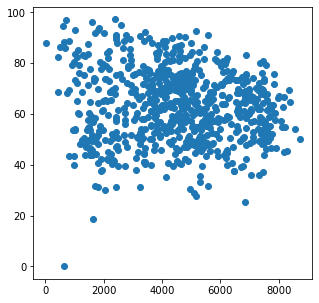

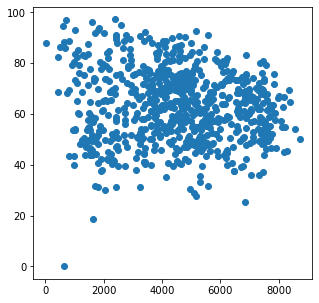

In [137]:
plt.scatter(x=bike_data["cnt"], y=bike_data["hum"])

### Linear Regression Model Preparation

In [138]:
#the dataset we created earlier for model making
bike_data_lr=pd.read_csv("day.csv")

In [139]:
bike_data_lr.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [140]:
bike_data_lr.drop(["instant", "casual", "registered"],axis=1,inplace= True)

In [141]:
bike_data_lr

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796


In [142]:
bike_data_lr["age"]=(pd.to_datetime(bike_data["dteday"],format= "%d-%m-%Y") - pd.to_datetime("01-01-2018",format="%d-%m-%Y")).dt.days

In [143]:
bike_data_lr.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [144]:
bike_data_lr.drop("dteday",axis=1,inplace= True)

In [145]:
bike_data_lr.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [146]:
bike_data_lr = pd.get_dummies(data= bike_data_lr, columns= ["mnth", "weekday", "weathersit", "season"], drop_first= True)

In [147]:
bike_data_lr.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,age,mnth_2,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,season_2,season_3,season_4
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,0,...,0,0,0,1,0,0,0,0,0,0


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,age,mnth_2,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,season_2,season_3,season_4
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,0,...,0,0,0,1,0,0,0,0,0,0


In [148]:
bike_data_lr.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'age', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weathersit_2', 'weathersit_3', 'season_2', 'season_3',
       'season_4'],
      dtype='object')

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'age', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weathersit_2', 'weathersit_3', 'season_2', 'season_3',
       'season_4'],
      dtype='object')

In [149]:
#standardising the variables using MinMaxScaler

scaler= MinMaxScaler()
num=["temp", "atemp","hum", "windspeed","cnt", "age"]
bike_data_lr[num]= scaler.fit_transform(bike_data_lr[num])

In [150]:
bike_data_lr.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,age,mnth_2,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,season_2,season_3,season_4
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,0.543852,0.519090,0.645400,0.346568,0.516108,0.500000,0.076712,...,0.143836,0.142466,0.142466,0.142466,0.142466,0.336986,0.028767,0.252055,0.257534,0.243836
std,0.500343,0.167266,0.462641,0.228140,0.213968,0.146402,0.159873,0.222735,0.289269,0.266317,...,0.351164,0.349767,0.349767,0.349767,0.349767,0.473004,0.167266,0.434490,0.437576,0.429689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.346084,0.339611,0.534704,0.232045,0.362143,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.548307,0.535942,0.643959,0.326928,0.520766,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.743261,0.695494,0.750535,0.434629,0.683847,0.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,age,mnth_2,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,season_2,season_3,season_4
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,0.543852,0.519090,0.645400,0.346568,0.516108,0.500000,0.076712,...,0.143836,0.142466,0.142466,0.142466,0.142466,0.336986,0.028767,0.252055,0.257534,0.243836
std,0.500343,0.167266,0.462641,0.228140,0.213968,0.146402,0.159873,0.222735,0.289269,0.266317,...,0.351164,0.349767,0.349767,0.349767,0.349767,0.473004,0.167266,0.434490,0.437576,0.429689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.346084,0.339611,0.534704,0.232045,0.362143,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.548307,0.535942,0.643959,0.326928,0.520766,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.743261,0.695494,0.750535,0.434629,0.683847,0.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [151]:
y=bike_data_lr.pop('cnt')

In [152]:
y.head()

0    0.110792
1    0.089623
2    0.152669
3    0.177174
4    0.181546
Name: cnt, dtype: float64

0    0.110792
1    0.089623
2    0.152669
3    0.177174
4    0.181546
Name: cnt, dtype: float64

In [153]:
X= bike_data_lr

In [154]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,age,mnth_2,mnth_3,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,season_2,season_3,season_4
0,0,0,1,0.355170,0.373517,0.828620,0.284606,0.000000,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0.379232,0.360541,0.715771,0.466215,0.001372,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,1,0.171000,0.144830,0.449638,0.465740,0.002743,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0.175530,0.174649,0.607131,0.284297,0.004115,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0.209120,0.197158,0.449313,0.339143,0.005487,0,0,...,0,0,0,1,0,0,0,0,0,0


,yr,holiday,workingday,temp,atemp,hum,windspeed,age,mnth_2,mnth_3,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,season_2,season_3,season_4
0,0,0,1,0.355170,0.373517,0.828620,0.284606,0.000000,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0.379232,0.360541,0.715771,0.466215,0.001372,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,1,0.171000,0.144830,0.449638,0.465740,0.002743,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0.175530,0.174649,0.607131,0.284297,0.004115,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0.209120,0.197158,0.449313,0.339143,0.005487,0,0,...,0,0,0,1,0,0,0,0,0,0


In [155]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'age', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_2', 'weathersit_3', 'season_2', 'season_3', 'season_4'],
      dtype='object')

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'age', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_2', 'weathersit_3', 'season_2', 'season_3', 'season_4'],
      dtype='object')

In [156]:
#splitting the data into training and test set
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.7, random_state= 100)

In [157]:
X_train.shape

(510, 30)

(510, 30)

In [158]:
X_test.shape

(220, 30)

(220, 30)

In [159]:
y_train.shape

(510,)

(510,)

In [160]:
y_test.shape

(220,)

(220,)

In [161]:
#building the actual model with sklearn
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

LinearRegression()

In [162]:
#rfe for recusrssive feature selection and elimination
rfe= RFE(lr, 12)

In [163]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=12)

RFE(estimator=LinearRegression(), n_features_to_select=12)

In [164]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 13),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('age', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 6),
 ('mnth_4', False, 8),
 ('mnth_5', False, 7),
 ('mnth_6', False, 10),
 ('mnth_7', False, 3),
 ('mnth_8', False, 9),
 ('mnth_9', True, 1),
 ('mnth_10', False, 11),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weekday_1', False, 17),
 ('weekday_2', False, 18),
 ('weekday_3', False, 16),
 ('weekday_4', False, 14),
 ('weekday_5', False, 15),
 ('weekday_6', False, 19),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 4),
 ('season_4', True, 1)]

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 13),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('age', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 6),
 ('mnth_4', False, 8),
 ('mnth_5', False, 7),
 ('mnth_6', False, 10),
 ('mnth_7', False, 3),
 ('mnth_8', False, 9),
 ('mnth_9', True, 1),
 ('mnth_10', False, 11),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weekday_1', False, 17),
 ('weekday_2', False, 18),
 ('weekday_3', False, 16),
 ('weekday_4', False, 14),
 ('weekday_5', False, 15),
 ('weekday_6', False, 19),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 4),
 ('season_4', True, 1)]

In [165]:
#adding all the variables to the model at once
X_train_sm= sm.add_constant(X_train)

In [166]:
X_train_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,age,mnth_2,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,season_2,season_3,season_4
576,1.0,1,0,1,0.815169,0.766351,0.724079,0.294871,0.790123,0,...,0,1,0,0,0,0,0,0,1,0
426,1.0,1,0,0,0.442393,0.438975,0.638817,0.285911,0.584362,0,...,0,0,0,0,0,1,0,0,0,0
728,1.0,1,0,1,0.245101,0.200348,0.497001,0.676936,0.998628,0,...,0,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.391735,0.503427,0.221789,0.661180,0,...,0,0,0,0,0,1,0,1,0,0
111,1.0,0,0,0,0.345824,0.318819,0.750214,0.406392,0.152263,0,...,0,0,0,0,0,1,0,1,0,0


,const,yr,holiday,workingday,temp,atemp,hum,windspeed,age,mnth_2,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,season_2,season_3,season_4
576,1.0,1,0,1,0.815169,0.766351,0.724079,0.294871,0.790123,0,...,0,1,0,0,0,0,0,0,1,0
426,1.0,1,0,0,0.442393,0.438975,0.638817,0.285911,0.584362,0,...,0,0,0,0,0,1,0,0,0,0
728,1.0,1,0,1,0.245101,0.200348,0.497001,0.676936,0.998628,0,...,0,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.391735,0.503427,0.221789,0.661180,0,...,0,0,0,0,0,1,0,1,0,0
111,1.0,0,0,0,0.345824,0.318819,0.750214,0.406392,0.152263,0,...,0,0,0,0,0,1,0,1,0,0


In [167]:
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()

In [168]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     90.67
Date:                Mon, 31 Oct 2022   Prob (F-statistic):          1.15e-176
Time:                        13:48:42   Log-Likelihood:                 523.13
No. Observations:                 510   AIC:                            -984.3
Df Residuals:                     479   BIC:                            -853.0
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2462      0.031      7.863      0.000       0.185       0.308
yr               0.2867      0.166      1.729      0.084      -0.039       0.613
holiday         -0.1344      0.066     -2.050      0.041      -0.263      -0.006
workingday      -0.0602      0.071     -0.845      0.399      -0.200       0.080
temp             0.3893      0.144      2.708      0.007       0.107       0.672
atemp            0.0523      0.140      0.374      0.708      -0.222       0.327
hum             -0.1573      0.039     -4.014      0.000      -0.234      -0.080
windspeed       -0.1877      0.028     -6.734      0.000      -0.242      -0.133
age             -0.1108      0.331     -0.335      0.738      -0.760       0.539
mnth_2           0.0312      0.025      1.259      0.208      -0.017       0.080
mnth_3           0.0738      0.034      2.140      0.033       0.006       0.142
mnth_4           0.0771      0.052      1.493      0.136      -0.024       0.178
mnth_5           0.1070      0.064      1.681      0.093      -0.018       0.232
mnth_6           0.0962      0.078      1.237      0.217      -0.057       0.249
mnth_7           0.0637      0.092      0.691      0.490      -0.117       0.245
mnth_8           0.1249      0.104      1.202      0.230      -0.079       0.329
mnth_9           0.1919      0.115      1.671      0.095      -0.034       0.418
mnth_10          0.1117      0.130      0.860      0.390      -0.143       0.367
mnth_11          0.0708      0.142      0.498      0.619      -0.209       0.350
mnth_12          0.0703      0.154      0.458      0.647      -0.231       0.372
weekday_1        0.0248      0.072      0.346      0.730      -0.116       0.166
weekday_2        0.0234      0.071      0.328      0.743      -0.117       0.164
weekday_3        0.0394      0.071      0.556      0.578      -0.100       0.179
weekday_4        0.0539      0.072      0.749      0.454      -0.087       0.195
weekday_5        0.0496      0.072      0.691      0.490      -0.091       0.191
weekday_6       -0.0058      0.015     -0.375      0.708      -0.036       0.025
weathersit_2    -0.0582      0.011     -5.487      0.000      -0.079      -0.037
weathersit_3    -0.2496      0.027     -9.321      0.000      -0.302      -0.197
season_2         0.0874      0.024      3.644      0.000       0.040       0.134
season_3         0.0415      0.030      1.365      0.173      -0.018       0.101
season_4         0.1529      0.026      5.814      0.000       0.101       0.205
==============================================================================
Omnibus:                       77.579   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.012
Skew:                          -0.758   Prob(JB):                     5.01e-45
Kurtosis:    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     90.67
Date:                Mon, 31 Oct 2022   Prob (F-statistic):          1.15e-176
Time:                        13:48:42   Log-Likelihood:                 523.13
No. Observations:                 510   AIC:                            -984.3
Df Residuals:                     479   BIC:                            -853.0
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2462      0.031      7.863      0.000       0.185       0.308
yr               0.2867      0.166      1.729      0.084      -0.039       0.613
holiday         -0.1344      0.066     -2.050      0.041      -0.263      -0.006
workingday      -0.0602      0.071     -0.845      0.399      -0.200       0.080
temp             0.3893      0.144      2.708      0.007       0.107       0.672
atemp            0.0523      0.140      0.374      0.708      -0.222       0.327
hum             -0.1573      0.039     -4.014      0.000      -0.234      -0.080
windspeed       -0.1877      0.028     -6.734      0.000      -0.242      -0.133
age             -0.1108      0.331     -0.335      0.738      -0.760       0.539
mnth_2           0.0312      0.025      1.259      0.208      -0.017       0.080
mnth_3           0.0738      0.034      2.140      0.033       0.006       0.142
mnth_4           0.0771      0.052      1.493      0.136      -0.024       0.178
mnth_5           0.1070      0.064      1.681      0.093      -0.018       0.232
mnth_6           0.0962      0.078      1.237      0.217      -0.057       0.249
mnth_7           0.0637      0.092      0.691      0.490      -0.117       0.245
mnth_8           0.1249      0.104      1.202      0.230      -0.079       0.329
mnth_9           0.1919      0.115      1.671      0.095      -0.034       0.418
mnth_10          0.1117      0.130      0.860      0.390      -0.143       0.367
mnth_11          0.0708      0.142      0.498      0.619      -0.209       0.350
mnth_12          0.0703      0.154      0.458      0.647      -0.231       0.372
weekday_1        0.0248      0.072      0.346      0.730      -0.116       0.166
weekday_2        0.0234      0.071      0.328      0.743      -0.117       0.164
weekday_3        0.0394      0.071      0.556      0.578      -0.100       0.179
weekday_4        0.0539      0.072      0.749      0.454      -0.087       0.195
weekday_5        0.0496      0.072      0.691      0.490      -0.091       0.191
weekday_6       -0.0058      0.015     -0.375      0.708      -0.036       0.025
weathersit_2    -0.0582      0.011     -5.487      0.000      -0.079      -0.037
weathersit_3    -0.2496      0.027     -9.321      0.000      -0.302      -0.197
season_2         0.0874      0.024      3.644      0.000       0.040       0.134
season_3         0.0415      0.030      1.365      0.173      -0.018       0.101
season_4         0.1529      0.026      5.814      0.000       0.101       0.205
==============================================================================
Omnibus:                       77.579   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.012
Skew:                          -0.758   Prob(JB):                     5.01e-45
Kurtosis:    

In [169]:
#features that rfe selected
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'age', 'mnth_9', 'mnth_11',
       'mnth_12', 'weathersit_3', 'season_2', 'season_4'],
      dtype='object')

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'age', 'mnth_9', 'mnth_11',
       'mnth_12', 'weathersit_3', 'season_2', 'season_4'],
      dtype='object')

In [170]:
#features that rfe did not select
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_10', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'season_3'],
      dtype='object')

Index(['workingday', 'atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_10', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'season_3'],
      dtype='object')

In [171]:
columns= X_train.columns[rfe.support_ == True]

In [172]:
X_train_rfe= X_train[columns]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,age,mnth_9,mnth_11,mnth_12,weathersit_3,season_2,season_4
576,1,0,0.815169,0.724079,0.294871,0.790123,0,0,0,0,0,0
426,1,0,0.442393,0.638817,0.285911,0.584362,0,0,0,0,0,0
728,1,0,0.245101,0.497001,0.676936,0.998628,0,0,1,0,0,0
482,1,0,0.395666,0.503427,0.221789,0.661180,0,0,0,0,1,0
111,0,0,0.345824,0.750214,0.406392,0.152263,0,0,0,0,1,0


,yr,holiday,temp,hum,windspeed,age,mnth_9,mnth_11,mnth_12,weathersit_3,season_2,season_4
576,1,0,0.815169,0.724079,0.294871,0.790123,0,0,0,0,0,0
426,1,0,0.442393,0.638817,0.285911,0.584362,0,0,0,0,0,0
728,1,0,0.245101,0.497001,0.676936,0.998628,0,0,1,0,0,0
482,1,0,0.395666,0.503427,0.221789,0.661180,0,0,0,0,1,0
111,0,0,0.345824,0.750214,0.406392,0.152263,0,0,0,0,1,0


In [173]:
X_train_sm= sm.add_constant(X_train_rfe)

In [174]:
X_train_sm

,const,yr,holiday,temp,hum,windspeed,age,mnth_9,mnth_11,mnth_12,weathersit_3,season_2,season_4
576,1.0,1,0,0.815169,0.724079,0.294871,0.790123,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.638817,0.285911,0.584362,0,0,0,0,0,0
728,1.0,1,0,0.245101,0.497001,0.676936,0.998628,0,0,1,0,0,0
482,1.0,1,0,0.395666,0.503427,0.221789,0.661180,0,0,0,0,1,0
111,1.0,0,0,0.345824,0.750214,0.406392,0.152263,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.678234,0.220508,0.792867,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.435006,0.147857,0.072702,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.576692,0.455140,0.480110,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.758243,0.549180,0.108368,0,0,0,0,1,0


,const,yr,holiday,temp,hum,windspeed,age,mnth_9,mnth_11,mnth_12,weathersit_3,season_2,season_4
576,1.0,1,0,0.815169,0.724079,0.294871,0.790123,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.638817,0.285911,0.584362,0,0,0,0,0,0
728,1.0,1,0,0.245101,0.497001,0.676936,0.998628,0,0,1,0,0,0
482,1.0,1,0,0.395666,0.503427,0.221789,0.661180,0,0,0,0,1,0
111,1.0,0,0,0.345824,0.750214,0.406392,0.152263,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.678234,0.220508,0.792867,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.435006,0.147857,0.072702,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.576692,0.455140,0.480110,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.758243,0.549180,0.108368,0,0,0,0,1,0


In [175]:
#training the model with the variables supported by rfe
lr= sm.OLS(y_train, X_train_sm)

In [176]:
lr_model= lr.fit()

In [177]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.7
Date:                Mon, 31 Oct 2022   Prob (F-statistic):          2.06e-184
Time:                        13:48:43   Log-Likelihood:                 495.43
No. Observations:                 510   AIC:                            -964.9
Df Residuals:                     497   BIC:                            -909.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2823      0.027     10.451      0.000       0.229       0.335
yr               0.1213      0.039      3.131      0.002       0.045       0.197
holiday         -0.0880      0.026     -3.332      0.001      -0.140      -0.036
temp             0.5160      0.033     15.597      0.000       0.451       0.581
hum             -0.2797      0.032     -8.828      0.000      -0.342      -0.217
windspeed       -0.2139      0.027     -7.852      0.000      -0.267      -0.160
age              0.2147      0.077      2.786      0.006       0.063       0.366
mnth_9           0.0836      0.017      4.779      0.000       0.049       0.118
mnth_11         -0.0529      0.022     -2.399      0.017      -0.096      -0.010
mnth_12         -0.0693      0.026     -2.637      0.009      -0.121      -0.018
weathersit_3    -0.2015      0.026     -7.841      0.000      -0.252      -0.151
season_2         0.0929      0.011      8.798      0.000       0.072       0.114
season_4         0.1175      0.018      6.395      0.000       0.081       0.154
==============================================================================
Omnibus:                       77.061   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.415
Skew:                          -0.823   Prob(JB):                     1.20e-36
Kurtosis:                       5.253   Cond. No.                         36.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.7
Date:                Mon, 31 Oct 2022   Prob (F-statistic):          2.06e-184
Time:                        13:48:43   Log-Likelihood:                 495.43
No. Observations:                 510   AIC:                            -964.9
Df Residuals:                     497   BIC:                            -909.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2823      0.027     10.451      0.000       0.229       0.335
yr               0.1213      0.039      3.131      0.002       0.045       0.197
holiday         -0.0880      0.026     -3.332      0.001      -0.140      -0.036
temp             0.5160      0.033     15.597      0.000       0.451       0.581
hum             -0.2797      0.032     -8.828      0.000      -0.342      -0.217
windspeed       -0.2139      0.027     -7.852      0.000      -0.267      -0.160
age              0.2147      0.077      2.786      0.006       0.063       0.366
mnth_9           0.0836      0.017      4.779      0.000       0.049       0.118
mnth_11         -0.0529      0.022     -2.399      0.017      -0.096      -0.010
mnth_12         -0.0693      0.026     -2.637      0.009      -0.121      -0.018
weathersit_3    -0.2015      0.026     -7.841      0.000      -0.252      -0.151
season_2         0.0929      0.011      8.798      0.000       0.072       0.114
season_4         0.1175      0.018      6.395      0.000       0.081       0.154
==============================================================================
Omnibus:                       77.061   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.415
Skew:                          -0.823   Prob(JB):                     1.20e-36
Kurtosis:                       5.253   Cond. No.                         36.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
vif=pd.DataFrame()
X=X_train_sm
vif["features"]= X.columns
vif["VIF"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [179]:
vif

,features,VIF
0,const,43.210017
1,yr,22.226140
2,holiday,1.026884
3,temp,3.300865
4,hum,1.256802
5,windspeed,1.163238
6,age,29.041006
7,mnth_9,1.340059
8,mnth_11,2.272290
9,mnth_12,3.157520


,features,VIF
0,const,43.210017
1,yr,22.226140
2,holiday,1.026884
3,temp,3.300865
4,hum,1.256802
5,windspeed,1.163238
6,age,29.041006
7,mnth_9,1.340059
8,mnth_11,2.272290
9,mnth_12,3.157520


In [180]:
X_train_new= X_train_sm.drop("age", axis= 1)

In [181]:
X_train_new.head()

,const,yr,holiday,temp,hum,windspeed,mnth_9,mnth_11,mnth_12,weathersit_3,season_2,season_4
576,1.0,1,0,0.815169,0.724079,0.294871,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.638817,0.285911,0,0,0,0,0,0
728,1.0,1,0,0.245101,0.497001,0.676936,0,0,1,0,0,0
482,1.0,1,0,0.395666,0.503427,0.221789,0,0,0,0,1,0
111,1.0,0,0,0.345824,0.750214,0.406392,0,0,0,0,1,0


,const,yr,holiday,temp,hum,windspeed,mnth_9,mnth_11,mnth_12,weathersit_3,season_2,season_4
576,1.0,1,0,0.815169,0.724079,0.294871,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.638817,0.285911,0,0,0,0,0,0
728,1.0,1,0,0.245101,0.497001,0.676936,0,0,1,0,0,0
482,1.0,1,0,0.395666,0.503427,0.221789,0,0,0,0,1,0
111,1.0,0,0,0.345824,0.750214,0.406392,0,0,0,0,1,0


In [182]:
lm=sm.OLS(y_train, X_train_new)
lm_model= lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     221.8
Date:                Mon, 31 Oct 2022   Prob (F-statistic):          6.26e-184
Time:                        13:48:44   Log-Likelihood:                 491.48
No. Observations:                 510   AIC:                            -959.0
Df Residuals:                     498   BIC:                            -908.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2813      0.027     10.346      0.000       0.228       0.335
yr               0.2267      0.008     27.072      0.000       0.210       0.243
holiday         -0.0886      0.027     -3.333      0.001      -0.141      -0.036
temp             0.5881      0.021     28.342      0.000       0.547       0.629
hum             -0.2799      0.032     -8.776      0.000      -0.343      -0.217
windspeed       -0.2125      0.027     -7.750      0.000      -0.266      -0.159
mnth_9           0.1028      0.016      6.350      0.000       0.071       0.135
mnth_11         -0.0213      0.019     -1.120      0.263      -0.059       0.016
mnth_12         -0.0142      0.017     -0.815      0.415      -0.048       0.020
weathersit_3    -0.1967      0.026     -7.621      0.000      -0.247      -0.146
season_2         0.0884      0.011      8.411      0.000       0.068       0.109
season_4         0.1530      0.013     11.477      0.000       0.127       0.179
==============================================================================
Omnibus:                       63.555   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.110
Skew:                          -0.741   Prob(JB):                     2.25e-26
Kurtosis:                       4.833   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     221.8
Date:                Mon, 31 Oct 2022   Prob (F-statistic):          6.26e-184
Time:                        13:48:44   Log-Likelihood:                 491.48
No. Observations:                 510   AIC:                            -959.0
Df Residuals:                     498   BIC:                            -908.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2813      0.027     10.346      0.000       0.228       0.335
yr               0.2267      0.008     27.072      0.000       0.210       0.243
holiday         -0.0886      0.027     -3.333      0.001      -0.141      -0.036
temp             0.5881      0.021     28.342      0.000       0.547       0.629
hum             -0.2799      0.032     -8.776      0.000      -0.343      -0.217
windspeed       -0.2125      0.027     -7.750      0.000      -0.266      -0.159
mnth_9           0.1028      0.016      6.350      0.000       0.071       0.135
mnth_11         -0.0213      0.019     -1.120      0.263      -0.059       0.016
mnth_12         -0.0142      0.017     -0.815      0.415      -0.048       0.020
weathersit_3    -0.1967      0.026     -7.621      0.000      -0.247      -0.146
season_2         0.0884      0.011      8.411      0.000       0.068       0.109
season_4         0.1530      0.013     11.477      0.000       0.127       0.179
==============================================================================
Omnibus:                       63.555   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.110
Skew:                          -0.741   Prob(JB):                     2.25e-26
Kurtosis:                       4.833   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
vif=pd.DataFrame()
X= X_train_new
vif["features"]= X.columns
vif["VIF"]= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

,features,VIF
0,const,43.202830
1,yr,1.024600
2,holiday,1.026812
3,temp,1.281109
4,hum,1.256793
5,windspeed,1.162850
6,mnth_9,1.132082
7,mnth_11,1.672542
8,mnth_12,1.369709
9,weathersit_3,1.112035


,features,VIF
0,const,43.202830
1,yr,1.024600
2,holiday,1.026812
3,temp,1.281109
4,hum,1.256793
5,windspeed,1.162850
6,mnth_9,1.132082
7,mnth_11,1.672542
8,mnth_12,1.369709
9,weathersit_3,1.112035


In [184]:
#mnth_11 , mnth_12 have high p- values which means they have to be eliminated
X_train_new= X_train_new.drop(["mnth_11", "mnth_12"], axis=1)

In [185]:
X_train_new.head()

,const,yr,holiday,temp,hum,windspeed,mnth_9,weathersit_3,season_2,season_4
576,1.0,1,0,0.815169,0.724079,0.294871,0,0,0,0
426,1.0,1,0,0.442393,0.638817,0.285911,0,0,0,0
728,1.0,1,0,0.245101,0.497001,0.676936,0,0,0,0
482,1.0,1,0,0.395666,0.503427,0.221789,0,0,1,0
111,1.0,0,0,0.345824,0.750214,0.406392,0,0,1,0


,const,yr,holiday,temp,hum,windspeed,mnth_9,weathersit_3,season_2,season_4
576,1.0,1,0,0.815169,0.724079,0.294871,0,0,0,0
426,1.0,1,0,0.442393,0.638817,0.285911,0,0,0,0
728,1.0,1,0,0.245101,0.497001,0.676936,0,0,0,0
482,1.0,1,0,0.395666,0.503427,0.221789,0,0,1,0
111,1.0,0,0,0.345824,0.750214,0.406392,0,0,1,0


In [186]:
lm= sm.OLS(y_train, X_train_new)
lm_model= lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.2
Date:                Mon, 31 Oct 2022   Prob (F-statistic):          4.74e-186
Time:                        13:48:44   Log-Likelihood:                 490.74
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     500   BIC:                            -919.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2769      0.027     10.305      0.000       0.224       0.330
yr               0.2268      0.008     27.103      0.000       0.210       0.243
holiday         -0.0915      0.026     -3.467      0.001      -0.143      -0.040
temp             0.5928      0.020     29.471      0.000       0.553       0.632
hum             -0.2790      0.032     -8.776      0.000      -0.342      -0.217
windspeed       -0.2121      0.027     -7.755      0.000      -0.266      -0.158
mnth_9           0.1052      0.016      6.554      0.000       0.074       0.137
weathersit_3    -0.1948      0.026     -7.570      0.000      -0.245      -0.144
season_2         0.0892      0.010      8.523      0.000       0.069       0.110
season_4         0.1434      0.011     13.413      0.000       0.122       0.164
==============================================================================
Omnibus:                       60.303   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.427
Skew:                          -0.717   Prob(JB):                     1.73e-24
Kurtosis:                       4.759   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.2
Date:                Mon, 31 Oct 2022   Prob (F-statistic):          4.74e-186
Time:                        13:48:44   Log-Likelihood:                 490.74
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     500   BIC:                            -919.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2769      0.027     10.305      0.000       0.224       0.330
yr               0.2268      0.008     27.103      0.000       0.210       0.243
holiday         -0.0915      0.026     -3.467      0.001      -0.143      -0.040
temp             0.5928      0.020     29.471      0.000       0.553       0.632
hum             -0.2790      0.032     -8.776      0.000      -0.342      -0.217
windspeed       -0.2121      0.027     -7.755      0.000      -0.266      -0.158
mnth_9           0.1052      0.016      6.554      0.000       0.074       0.137
weathersit_3    -0.1948      0.026     -7.570      0.000      -0.245      -0.144
season_2         0.0892      0.010      8.523      0.000       0.069       0.110
season_4         0.1434      0.011     13.413      0.000       0.122       0.164
==============================================================================
Omnibus:                       60.303   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.427
Skew:                          -0.717   Prob(JB):                     1.73e-24
Kurtosis:                       4.759   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [187]:
vif= pd.DataFrame()
X=X_train_new
vif["features"]= X.columns
vif["VIF"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,features,VIF
0,const,42.253084
1,yr,1.024439
2,holiday,1.012950
3,temp,1.205377
4,hum,1.250267
5,windspeed,1.158447
6,mnth_9,1.114155
7,weathersit_3,1.105949
8,season_2,1.190983
9,season_4,1.244386


,features,VIF
0,const,42.253084
1,yr,1.024439
2,holiday,1.012950
3,temp,1.205377
4,hum,1.250267
5,windspeed,1.158447
6,mnth_9,1.114155
7,weathersit_3,1.105949
8,season_2,1.190983
9,season_4,1.244386


### Residual Analysis

In [188]:
X_train_new.head()

,const,yr,holiday,temp,hum,windspeed,mnth_9,weathersit_3,season_2,season_4
576,1.0,1,0,0.815169,0.724079,0.294871,0,0,0,0
426,1.0,1,0,0.442393,0.638817,0.285911,0,0,0,0
728,1.0,1,0,0.245101,0.497001,0.676936,0,0,0,0
482,1.0,1,0,0.395666,0.503427,0.221789,0,0,1,0
111,1.0,0,0,0.345824,0.750214,0.406392,0,0,1,0


,const,yr,holiday,temp,hum,windspeed,mnth_9,weathersit_3,season_2,season_4
576,1.0,1,0,0.815169,0.724079,0.294871,0,0,0,0
426,1.0,1,0,0.442393,0.638817,0.285911,0,0,0,0
728,1.0,1,0,0.245101,0.497001,0.676936,0,0,0,0
482,1.0,1,0,0.395666,0.503427,0.221789,0,0,1,0
111,1.0,0,0,0.345824,0.750214,0.406392,0,0,1,0


In [189]:
y_train_pred= lm_model.predict(X_train_new)

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

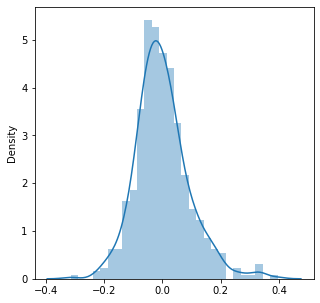

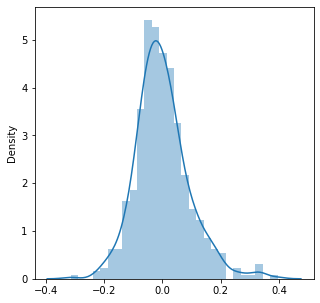

In [190]:
res= y_train_pred- y_train
sns.distplot(res)

In [191]:
r2_score(y_train, y_train_pred)

0.8299918316401657

0.8299918316401657

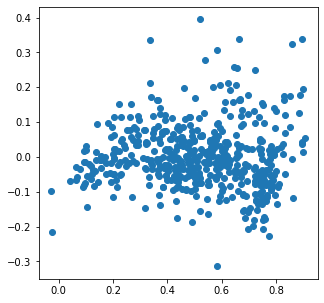

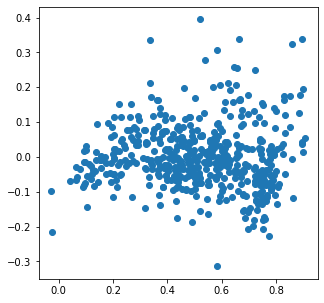

In [192]:
plt.scatter(y_train_pred, res)

In [193]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_9',
       'weathersit_3', 'season_2', 'season_4'],
      dtype='object')

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_9',
       'weathersit_3', 'season_2', 'season_4'],
      dtype='object')

### Testing the model

In [194]:
vars= ['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_9',
       'weathersit_3', 'season_2', 'season_4']
X_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,age,mnth_2,mnth_3,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,season_2,season_3,season_4
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.636854,0.341483,0.489887,0.100000,0.054545,...,0.122727,0.159091,0.140909,0.131818,0.172727,0.318182,0.027273,0.263636,0.245455,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148376,0.153033,0.293713,0.300684,0.227609,...,0.328872,0.366595,0.348721,0.339064,0.378873,0.466833,0.163248,0.441609,0.431338,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261354,0.000000,0.004115,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.528064,0.231732,0.233882,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.624250,0.328856,0.479424,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.742204,0.427237,0.739026,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.000000,0.815378,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,yr,holiday,workingday,temp,atemp,hum,windspeed,age,mnth_2,mnth_3,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,season_2,season_3,season_4
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.636854,0.341483,0.489887,0.100000,0.054545,...,0.122727,0.159091,0.140909,0.131818,0.172727,0.318182,0.027273,0.263636,0.245455,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148376,0.153033,0.293713,0.300684,0.227609,...,0.328872,0.366595,0.348721,0.339064,0.378873,0.466833,0.163248,0.441609,0.431338,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261354,0.000000,0.004115,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.528064,0.231732,0.233882,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.624250,0.328856,0.479424,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.742204,0.427237,0.739026,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.000000,0.815378,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [195]:
X_test_sm= sm.add_constant(X_test)

In [196]:
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,age,mnth_2,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,season_2,season_3,season_4
184,1.0,0,1,0,0.831783,0.769660,0.655956,0.121812,0.252401,0,...,0,1,0,0,0,1,0,0,1,0
535,1.0,1,0,1,0.901354,0.842587,0.608826,0.188468,0.733882,0,...,0,0,1,0,0,0,0,1,0,0
299,1.0,0,0,0,0.511964,0.496145,0.835904,0.361537,0.410151,0,...,0,0,0,0,1,1,0,0,0,1
221,1.0,0,0,1,0.881625,0.795343,0.436161,0.366681,0.303155,0,...,0,0,0,1,0,0,0,0,1,0
152,1.0,0,0,0,0.817246,0.741471,0.313625,0.556403,0.208505,0,...,0,0,0,0,1,0,0,1,0,0


,const,yr,holiday,workingday,temp,atemp,hum,windspeed,age,mnth_2,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,season_2,season_3,season_4
184,1.0,0,1,0,0.831783,0.769660,0.655956,0.121812,0.252401,0,...,0,1,0,0,0,1,0,0,1,0
535,1.0,1,0,1,0.901354,0.842587,0.608826,0.188468,0.733882,0,...,0,0,1,0,0,0,0,1,0,0
299,1.0,0,0,0,0.511964,0.496145,0.835904,0.361537,0.410151,0,...,0,0,0,0,1,1,0,0,0,1
221,1.0,0,0,1,0.881625,0.795343,0.436161,0.366681,0.303155,0,...,0,0,0,1,0,0,0,0,1,0
152,1.0,0,0,0,0.817246,0.741471,0.313625,0.556403,0.208505,0,...,0,0,0,0,1,0,0,1,0,0


In [197]:
y_test_pred=lm_model.predict(X_test_sm[vars])

In [198]:
r2_score(y_test, y_test_pred)

0.8036002511614432

0.8036002511614432

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

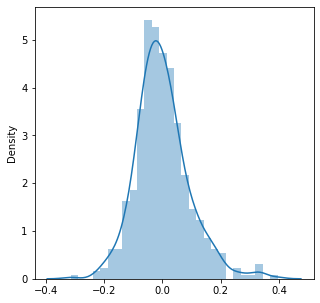

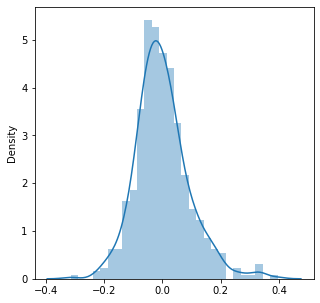

In [199]:
res_pred= y_test_pred- y_test
sns.distplot(res)

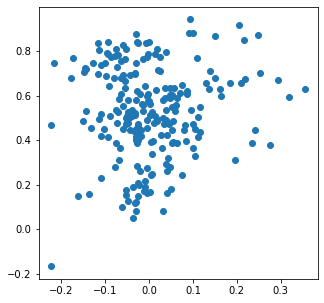

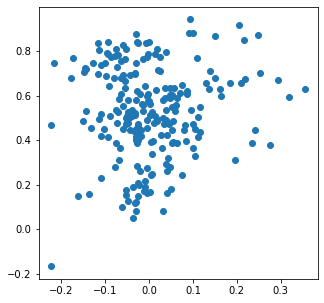

In [200]:
#plt.scatter(X_test, y_test)
plt.scatter(res_pred,y_test_pred)

## Inferences
 - As we can clearly see after training the model the model shows high R-squared value which it then carries ahead to the test as well the values being 83% for the test set and 80% for the test set the model is highly accurate and has a good understanding of the various factors.
 - As from the data we can see that the users are lower in the months of January and Febuary and peak during the middle of the year.
 - Company needs to focus on marketing better in spring season.
 - Less number of people use bikes on overcast days and rainy days.
 - Warmer and more humid days see more number of users.
 - The most important variables in the model are yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_9','weathersit_3', 'season_2', 'season_4'.
 - The distribution of the residuals in the form of a bell curve is also a characteristic of a good model which  this one has